<a href="https://colab.research.google.com/github/CarolineAndradeR/Data-Science/blob/main/An%C3%A1lise_de_Conglomerados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise Aglomerados** - Procurar concentração de objetos (clientes, transações, produtos, comportamentos etc) com o objetivo de entender o porquê de tal aglomeração e claro, decidir o que podemos fazer com esse conhecimento.


**Cluster** - A criação de um cluster se baseia justamente em não conhecer a características em comum entre os objetos.
Um trabalho de análise de aglomerados pode nos levar á descoberta de um novo grupo, que por sua vez, terá características em comum.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='wt', ylabel='mpg'>

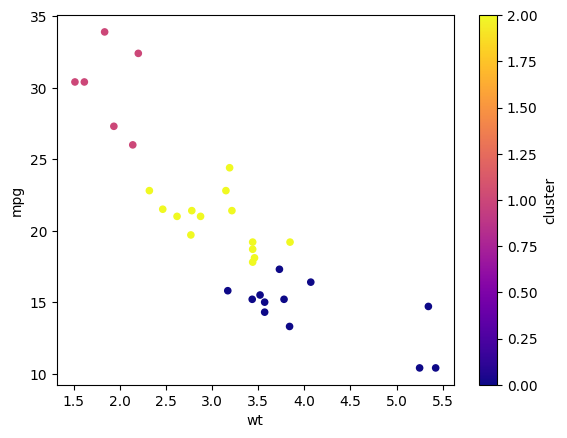

In [1]:
# carrega as bibliotecas pandas e Kmeans
import pandas as pd
from sklearn.cluster import KMeans
# carrega o dataset
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP-On-Line-Graduation/main/datasets/%20mtcars.csv")
# executa o algoritmo K-Means com 3 clusters, utilizando as variáveis mpg (milhas por galão) e wt (peso)
k = KMeans(n_clusters=3, random_state=0).fit(df[['mpg','wt']])
# adiciona o número do cluster (entre 0, 1 e 2) como uma nova coluna no dataframe
df['cluster'] = k.labels_
# visualização gráfico de dispersão das duas variáveis escolhidas, identificando no gráfico cada objeto o cluster ao qual pertence
df.plot.scatter(x='wt', y='mpg', c='cluster', colormap='plasma')